In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_filename = 'wandb_export_2024-12-04T19_56_43.325-05_00.csv'
df = pd.read_csv(csv_filename)
# https://huggingface.co/datasets/ntotsuka123/ja-pretrain/viewer/default/train?p=1&row=120

In [7]:
df = df.drop([0, 1, 10, 11, 12, 15,16,17,18,19])

In [8]:
def extract_size(name):
    if 'distilbert_base' in name:
        return '67M'
    elif 'bert_6M' in name or 'bert_6_' in name:
        return '6M'
    elif 'bert_11' in name:
        return '11M'
    elif 'bert_19' in name:
        return '19M'
    elif 'bert_35' in name:
        return '35M'
    elif 'bert_base' in name:
        return '110M'  # Regular BERT base models have ~110M parameters
    else:
        return 'other'

In [9]:
df['size'] = df['Name'].apply(extract_size)
df['Type'] = df['Name'].apply(lambda x: 'LTR' if 'ltr' in x else 'RTL')
df['val_loss_exp'] = np.exp(df['val_loss'])
df['params'] = df['size'].str.slice(stop=-1).apply(lambda s: int(s))
df

,Name,val_loss,size,Type,val_loss_exp,params
2,bert_6M_rtl_scratch,4.744476,6M,RTL,114.947528,6
3,bert_6_ltr_scratch,4.761365,6M,LTR,116.905354,6
4,bert_11_rtl_scratch,4.446950,11M,RTL,85.366156,11
5,bert_11_ltr_scratch,4.462379,11M,LTR,86.693476,11
6,bert_19_rtl_scratch,4.177320,19M,RTL,65.190932,19
7,bert_19_ltr_scratch,4.186271,19M,LTR,65.777026,19
8,bert_35_rtl_scratch,3.927857,35M,RTL,50.797983,35
9,bert_35_ltr_scratch,3.941595,35M,LTR,51.500691,35
13,distilbert_base_ltr_scratch,3.686307,67M,LTR,39.897253,67
14,distilbert_base_rtl_scratch,3.688566,67M,RTL,39.987461,67


/tmp/ipykernel_480557/1275629619.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='size', y='val_loss_exp', hue='Type', data=df_sorted_pairs, dodge=True, palette="Set2", ci=None)


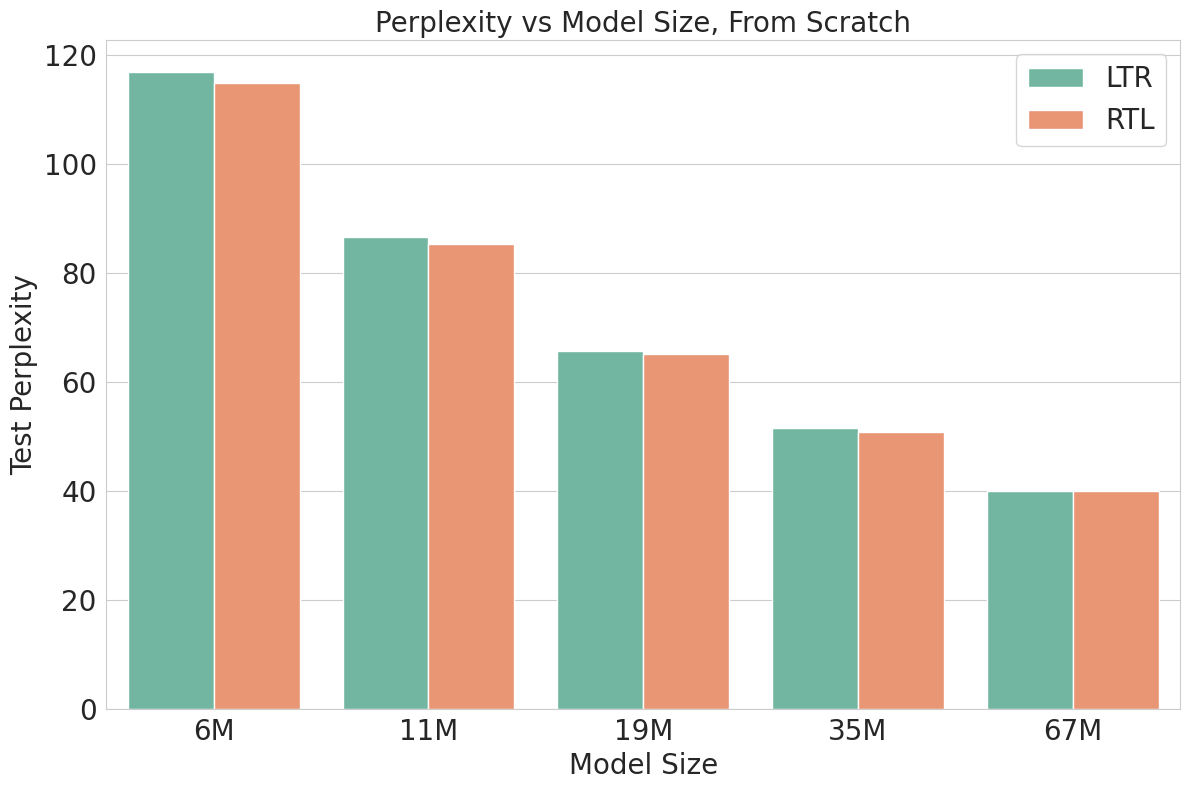

In [16]:
# Sort by size and then by LTR/RTL to group them together
df_sorted_pairs = df.sort_values(by=['params', 'Type'])

# Plot configuration
fig, axes = plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")

# Create bar plot with LTR and RTL next to each other, no error bars (ci=None)
sns.barplot(x='size', y='val_loss_exp', hue='Type', data=df_sorted_pairs, dodge=True, palette="Set2", ci=None)

# Adjustments to the plot
# plt.xticks(rotation=45)
plt.title("Perplexity vs Model Size, From Scratch", fontsize=20)
plt.xlabel("Model Size", fontsize=20)
plt.ylabel("Test Perplexity", fontsize=20)
# plt.legend(title="Model Type",fontsize=20)
plt.legend(title="",fontsize=20)
plt.tick_params(axis='both', labelsize=20)

# Display the updated plot
plt.tight_layout()
plt.show()

In [17]:
axes.get_ylim()

(0.0, 122.75062123923252)

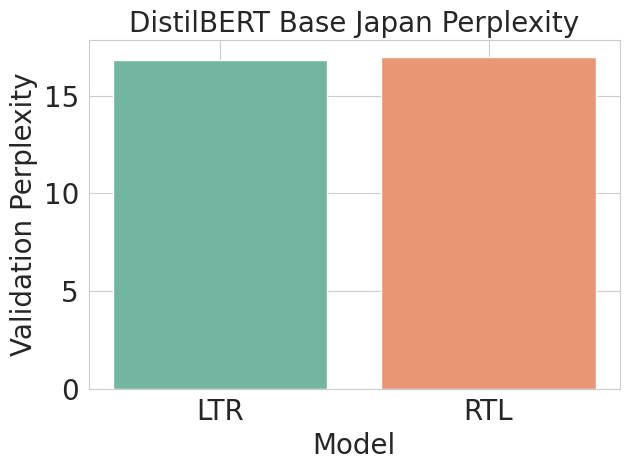

In [11]:
import matplotlib.pyplot as plt

# Data
names = ['LTR', 'RTL']
val_loss = [np.exp(2.8237654270093375), np.exp(2.8326140656842465)]

# Create bar plot
plt.bar(names, val_loss, color=['#72B6A1', '#E99675'])

# Add labels and title
plt.xlabel('Model', fontsize=20)
plt.ylabel('Validation Perplexity', fontsize=20)
plt.title('DistilBERT Base Japan Perplexity', fontsize=20)

# Show the plot
# plt.xticks(rotation=45, ha="right")  # Rotate x labels for better readability
plt.tick_params(axis='both', labelsize=20)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

/tmp/ipykernel_2794676/549159718.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='model', y='ppl', hue='direction', data=riddles_rtl_df_sorted_pairs, dodge=True, palette="Set2", ci=None)


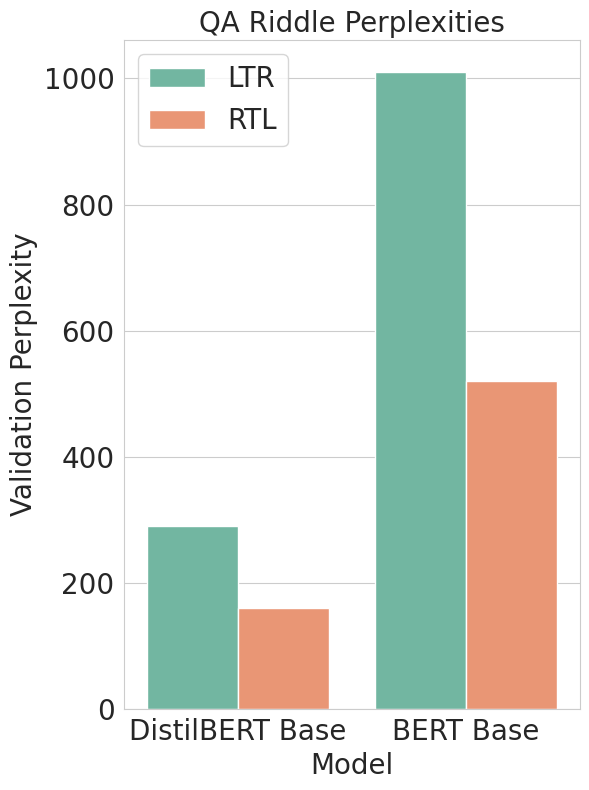

In [104]:
riddles_rtl_df = pd.DataFrame({
    'model': ['DistilBERT Base', 'DistilBERT Base', 'BERT Base', 'BERT Base'],
    'order': [0, 0, 1, 1],
    'direction': ["LTR", "RTL", "LTR", "RTL"],
    'ppl': [290, 160, 1010, 520],
})

riddles_rtl_df_sorted_pairs = riddles_rtl_df.sort_values(by=['order', 'direction'])

# Plot configuration
plt.figure(figsize=(6, 8))
sns.set_style("whitegrid")

# Create bar plot with LTR and RTL next to each other, no error bars (ci=None)
sns.barplot(x='model', y='ppl', hue='direction', data=riddles_rtl_df_sorted_pairs, dodge=True, palette="Set2", ci=None)

# Adjustments to the plot
# plt.xticks(rotation=45)
plt.title("QA Riddle Perplexities", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Validation Perplexity", fontsize=20)
plt.legend(title="", fontsize=20)
plt.tick_params(axis='both', labelsize=20)

# Display the updated plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_480557/2407310871.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='model', y='ppl', hue='direction', data=riddles_ltr_df_sorted_pairs, dodge=True, palette="Set2", ci=None)


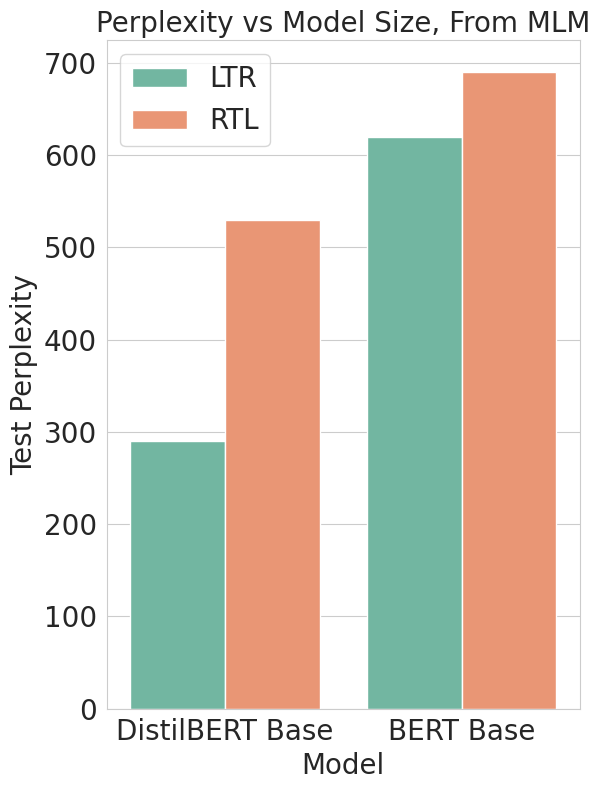

In [12]:
riddles_ltr_df = pd.DataFrame({
    'model': ['DistilBERT Base', 'DistilBERT Base', 'BERT Base', 'BERT Base'],
    'order': [0, 0, 1, 1],
    'direction': ["LTR", "RTL", "LTR", "RTL"],
    'ppl': [290, 530, 620, 690],
})

riddles_ltr_df_sorted_pairs = riddles_ltr_df.sort_values(by=['order', 'direction'])

# Plot configuration
plt.figure(figsize=(6, 8))
sns.set_style("whitegrid")

# Create bar plot with LTR and RTL next to each other, no error bars (ci=None)
sns.barplot(x='model', y='ppl', hue='direction', data=riddles_ltr_df_sorted_pairs, dodge=True, palette="Set2", ci=None)

# Adjustments to the plot
# plt.xticks(rotation=45)
plt.title("Perplexity vs Model Size, From MLM", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Test Perplexity", fontsize=20)
plt.legend(title="", fontsize=20)
plt.tick_params(axis='both', labelsize=20)

# Display the updated plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_480557/2459623878.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='model', y='ppl', hue='direction', data=transfer_wikitext_df.sort_values(by=['order', 'direction']), dodge=True, palette="Set2", ci=None)


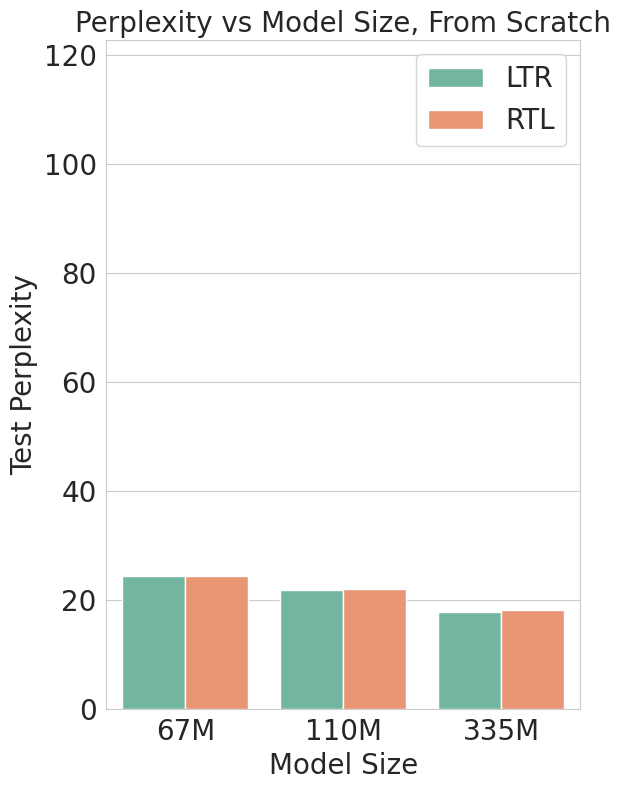

In [18]:
transfer_wikitext_df = pd.DataFrame({
    'model': ['67M', '67M', '110M', '110M', '335M', '335M'],
    'order': [0, 0, 1, 1, 2, 2],
    'direction': ["LTR", "RTL", "LTR", "RTL", "LTR", "RTL"],
    'ppl': [24.4, 24.4, 21.8, 21.9, 17.7, 18.1],
})


# Plot configuration
plt.figure(figsize=(6, 8))
sns.set_style("whitegrid")

# Create bar plot with LTR and RTL next to each other, no error bars (ci=None)
sns.barplot(x='model', y='ppl', hue='direction', data=transfer_wikitext_df.sort_values(by=['order', 'direction']), dodge=True, palette="Set2", ci=None)

# Adjustments to the plot
# plt.xticks(rotation=45)
plt.title("Perplexity vs Model Size, From Scratch", fontsize=20)
plt.xlabel("Model Size", fontsize=20)
plt.ylabel("Test Perplexity", fontsize=20)
plt.ylim(0.0, 122.75062123923252)
plt.legend(title="", fontsize=20)
plt.tick_params(axis='both', labelsize=20)

# Display the updated plot
plt.tight_layout()
plt.show()